In [1]:
import requests, json
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# base url for all FPL API endpoints
base_url = 'https://fantasy.premierleague.com/api/'

# get data from bootstrap-static endpoint
r = requests.get(base_url+'bootstrap-static/').json()

# show the top level fields
pprint(r, indent=2, depth=1, compact=True)

{ 'element_stats': [...],
  'element_types': [...],
  'elements': [...],
  'events': [...],
  'game_settings': {...},
  'phases': [...],
  'teams': [...],
  'total_players': 10767328}


In [3]:
# get player data from 'elements' field
players = r['elements']

# show data for first player
pprint(players[1])

{'assists': 3,
 'bonus': 7,
 'bps': 223,
 'chance_of_playing_next_round': None,
 'chance_of_playing_this_round': None,
 'clean_sheets': 4,
 'code': 84450,
 'corners_and_indirect_freekicks_order': None,
 'corners_and_indirect_freekicks_text': '',
 'cost_change_event': 0,
 'cost_change_event_fall': 0,
 'cost_change_start': 1,
 'cost_change_start_fall': -1,
 'creativity': '247.5',
 'creativity_rank': 29,
 'creativity_rank_type': 24,
 'direct_freekicks_order': 3,
 'direct_freekicks_text': '',
 'dreamteam_count': 1,
 'element_type': 3,
 'ep_next': '7.0',
 'ep_this': '6.5',
 'event_points': 10,
 'first_name': 'Granit',
 'form': '6.0',
 'form_rank': 13,
 'form_rank_type': 7,
 'goals_conceded': 11,
 'goals_scored': 3,
 'ict_index': '70.6',
 'ict_index_rank': 29,
 'ict_index_rank_type': 21,
 'id': 3,
 'in_dreamteam': False,
 'influence': '268.6',
 'influence_rank': 35,
 'influence_rank_type': 14,
 'minutes': 987,
 'news': '',
 'news_added': None,
 'now_cost': 51,
 'now_cost_rank': 174,
 'now_co

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# create players dataframe
players = pd.json_normalize(r['elements'])

# show some information about first five players
players[['id', 'web_name', 'team', 'element_type']].head(10)
players_data = players[['id', 'web_name', 'team']]
players_data

,id,web_name,team
0,1,Cédric,1
1,3,Xhaka,1
2,4,Elneny,1
3,5,Holding,1
4,6,Partey,1
...,...,...,...
643,579,Guedes,20
644,589,Matheus,20
645,608,Kalajdžić,20
646,625,Diego Costa,20


In [6]:
# create teams dataframe
teams = pd.json_normalize(r['teams'])
teams_data = teams[['id','name','short_name']]
teams_data

,id,name,short_name
0,1,Arsenal,ARS
1,2,Aston Villa,AVL
2,3,Bournemouth,BOU
3,4,Brentford,BRE
4,5,Brighton,BHA
5,6,Chelsea,CHE
6,7,Crystal Palace,CRY
7,8,Everton,EVE
8,9,Fulham,FUL
9,10,Leicester,LEI


In [7]:
# get position information from 'element_types' field
positions = pd.json_normalize(r['element_types'])
positions_data = positions[['id','singular_name','singular_name_short']]
positions_data

,id,singular_name,singular_name_short
0,1,Goalkeeper,GKP
1,2,Defender,DEF
2,3,Midfielder,MID
3,4,Forward,FWD


In [8]:
fixtures = requests.get(base_url+'fixtures/').json()
pprint(fixtures, indent=2, depth=1, compact=True)

[ {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...},
  {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...},
  {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...},
  {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...},
  {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...},
  {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...},
  {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...},
  {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...},
  {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...},
  {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...},
  {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...},
  {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...}, {...},
  {...}, {...}, {...}, {...}, {...}, {...}, {...}, {

In [9]:
fixtures[0]

{'code': 2292871,
 'event': None,
 'finished': False,
 'finished_provisional': False,
 'id': 61,
 'kickoff_time': None,
 'minutes': 0,
 'provisional_start_time': False,
 'started': None,
 'team_a': 8,
 'team_a_score': None,
 'team_h': 1,
 'team_h_score': None,
 'stats': [],
 'team_h_difficulty': 2,
 'team_a_difficulty': 4,
 'pulse_id': 74971}

In [10]:
matches = pd.DataFrame.from_dict(fixtures)
matches.sort_values(by=['id'], inplace=True)
matches.reset_index(drop=True, inplace=True)
matches.head()

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
0,2292810,1.0,True,True,1,2022-08-05T19:00:00Z,90,False,True,1,2.0,7,0.0,"[{'identifier': 'goals_scored', 'a': [{'value'...",3,3,74911
1,2292811,1.0,True,True,2,2022-08-06T14:00:00Z,90,False,True,2,0.0,3,2.0,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,2,74912
2,2292812,1.0,True,True,3,2022-08-06T16:30:00Z,90,False,True,6,1.0,8,0.0,"[{'identifier': 'goals_scored', 'a': [{'value'...",3,2,74913
3,2292813,1.0,True,True,4,2022-08-06T11:30:00Z,90,False,True,12,2.0,9,2.0,"[{'identifier': 'goals_scored', 'a': [{'value'...",4,2,74914
4,2292814,1.0,True,True,5,2022-08-06T14:00:00Z,90,False,True,20,1.0,11,2.0,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,2,74915


In [11]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   code                    380 non-null    int64  
 1   event                   366 non-null    float64
 2   finished                380 non-null    bool   
 3   finished_provisional    380 non-null    bool   
 4   id                      380 non-null    int64  
 5   kickoff_time            366 non-null    object 
 6   minutes                 380 non-null    int64  
 7   provisional_start_time  380 non-null    bool   
 8   started                 366 non-null    object 
 9   team_a                  380 non-null    int64  
 10  team_a_score            116 non-null    float64
 11  team_h                  380 non-null    int64  
 12  team_h_score            116 non-null    float64
 13  stats                   380 non-null    object 
 14  team_h_difficulty       380 non-null    in

In [12]:
matches_played =matches[matches['finished']==True]
print("Number of Matches Played: ",len(matches_played))
print(matches_played)

match_list = matches_played["id"].tolist()
print(match_list)

index_list = matches_played.index.values.tolist()
print(index_list)

Number of Matches Played:  116
        code  event  finished  finished_provisional   id  \
0    2292810    1.0      True                  True    1   
1    2292811    1.0      True                  True    2   
2    2292812    1.0      True                  True    3   
3    2292813    1.0      True                  True    4   
4    2292814    1.0      True                  True    5   
..       ...    ...       ...                   ...  ...   
125  2292935   13.0      True                  True  126   
126  2292936   13.0      True                  True  127   
127  2292937   13.0      True                  True  128   
128  2292938   13.0      True                  True  129   
129  2292939   13.0      True                  True  130   

             kickoff_time  minutes  provisional_start_time started  team_a  \
0    2022-08-05T19:00:00Z       90                   False    True       1   
1    2022-08-06T14:00:00Z       90                   False    True       2   
2    2022-08-0

In [13]:
events = matches_played.groupby('event').finished.count()
events

event
1.0     10
2.0     10
3.0     10
4.0     10
5.0     10
6.0     10
8.0      7
9.0     10
10.0    10
11.0    10
12.0     9
13.0    10
Name: finished, dtype: int64

In [14]:
next_gameweek = int(matches_played.event.max()+1)
next_gameweek

14

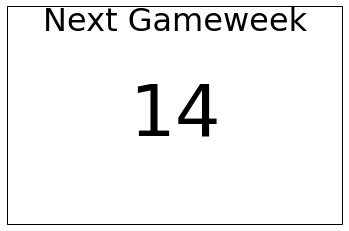

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax = plt.subplots()

# Build a rectangle in axes coords
# left, width = .5, 1
# bottom, height = .5, 1
# right = left + width
# top = bottom + height
p = plt.Rectangle((0, 0), 1, 1, fill=False)
p.set_transform(ax.transAxes)
p.set_clip_on(False)
ax.add_patch(p)

ax.text(0.5, 1, 'Next Gameweek',
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes,
        fontsize=32)

ax.text(0.5 , 0.5, int(next_gameweek),
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes,
        fontsize=72)

# ax.text(left, bottom, '**GW7 is not happened',
#         horizontalalignment='left',
#         verticalalignment='bottom',
#         transform=ax.transAxes)

ax.set_axis_off()

plt.show()
plt.savefig("Next Gameweek.png")

In [16]:
#team difficulty
difficulty = matches[['event','finished','id','kickoff_time','team_a','team_h','team_a_difficulty','team_h_difficulty']]
difficulty.head()

,event,finished,id,kickoff_time,team_a,team_h,team_a_difficulty,team_h_difficulty
0,1.0,True,1,2022-08-05T19:00:00Z,1,7,3,3
1,1.0,True,2,2022-08-06T14:00:00Z,2,3,2,2
2,1.0,True,3,2022-08-06T16:30:00Z,6,8,2,3
3,1.0,True,4,2022-08-06T11:30:00Z,12,9,2,4
4,1.0,True,5,2022-08-06T14:00:00Z,20,11,2,2


In [17]:
difficulty_df = pd.DataFrame(columns = ['event', 'team_id', 'difficulty'])
for i in range(len(difficulty)):
    difficulty_df = difficulty_df.append({'event': difficulty.event[i] ,'team_id': difficulty.team_a[i] ,\
                                          'difficulty': difficulty.team_a_difficulty[i]}, ignore_index = True)
    difficulty_df = difficulty_df.append({'event': difficulty.event[i] ,'team_id': difficulty.team_h[i] ,\
                                          'difficulty': difficulty.team_h_difficulty[i]}, ignore_index = True)
difficulty_df = difficulty_df.dropna(axis=0)
difficulty_df = difficulty_df.astype(int)
difficulty_df

,event,team_id,difficulty
0,1,1,3
1,1,7,3
2,1,2,2
3,1,3,2
4,1,6,2
...,...,...,...
755,38,10,2
756,38,9,4
757,38,14,2
758,38,12,2


In [18]:
difficulty_pivot = pd.pivot_table(difficulty_df, values='difficulty', index=['team_id'],\
                            columns=['event'], fill_value=0)
difficulty_pivot.style.background_gradient(vmin=1, vmax=5, cmap='hsv')

event,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
team_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,2,2,2,2,4,3,3,4,2,0,2,2,4,2,2,3,3,4,3,2,2,2,2,2,2,2,2,5,3,2,5,3,3,3,2,2
2,2,2,3,2,4,5,2,2,2,3,2,2,3,3,3,4,4,2,2,2,2,5,3,2,2,3,2,4,2,3,3,2,4,2,3,5,3
3,2,5,3,5,2,2,3,2,2,2,2,3,3,2,2,4,2,4,3,2,3,3,2,5,4,4,2,2,2,4,2,2,2,3,3,3,2
4,2,3,2,2,3,2,3,2,3,3,3,2,2,2,5,3,3,4,2,2,2,4,2,4,2,2,2,3,3,2,2,4,2,5,2,4,5
5,4,3,3,2,2,2,0,5,3,3,2,5,3,2,2,2,3,2,4,2,2,3,2,3,2,2,3,2,4,4,5,2,2,2,4,2,2
6,2,3,2,2,2,2,0,3,2,2,3,3,3,3,3,2,2,5,2,5,2,3,2,4,2,2,2,2,2,3,4,2,4,2,2,5,3
7,3,5,2,5,2,3,0,3,2,2,2,2,2,3,2,2,2,3,4,3,4,3,3,4,2,5,4,2,2,2,2,2,2,4,2,2,2
8,3,2,2,3,2,4,2,2,3,4,3,2,2,2,2,2,5,3,2,3,3,5,2,2,2,2,4,3,4,2,3,3,2,3,5,2,2
9,4,2,2,4,3,4,2,3,3,2,2,2,2,5,3,3,2,2,3,3,4,2,3,2,3,3,5,2,2,2,2,2,5,2,2,2,4


In [19]:
#difficulty for Next Gameweeks
diff_list_upgw = []
for j in range(1,21):
    x = 0
    for i in range(next_gameweek, next_gameweek+1):
        y = difficulty_pivot[i][j]
        x += y
        z= x
    diff_list_upgw.append(z)

df_diff_upgw = pd.DataFrame({'team_id': range(1,21), 'next_gw_diff': diff_list_upgw})
df_diff_upgw

,team_id,next_gw_diff
0,1,2
1,2,3
2,3,3
3,4,2
4,5,3
5,6,3
6,7,2
7,8,2
8,9,2
9,10,5


In [20]:
#difficulty for upcoming SIX Gameweeks

diff_list = []
for j in range(1,21):
    x = 0
    for i in range(next_gameweek, next_gameweek+6):
        y = difficulty_pivot[i][j]
        x += y
        z= x/6
    diff_list.append(z)

df_diff_6_gw = pd.DataFrame({'team_id': range(1,21), 'next_6_gw_diff': diff_list})
df_diff_6_gw

,team_id,next_6_gw_diff
0,1,2.666667
1,2,3.166667
2,3,2.833333
3,4,3.166667
4,5,2.333333
5,6,3.000000
6,7,2.333333
7,8,2.666667
8,9,2.833333
9,10,3.333333


In [21]:
# Upcoming Gameweek Matches

next_gw = matches[matches['event']==int(matches_played.event.max())+1]
next_gw = next_gw[['event','kickoff_time','team_h','team_a']]
next_gw['kickoff_time'] = next_gw['kickoff_time'].astype('datetime64[ns]')
next_gw.sort_values(['kickoff_time'], ascending=True).reset_index()
next_gw

,event,kickoff_time,team_h,team_a
130,14.0,2022-10-30 14:00:00,1,16
131,14.0,2022-10-29 14:00:00,3,18
132,14.0,2022-10-29 14:00:00,4,20
133,14.0,2022-10-29 14:00:00,5,6
134,14.0,2022-10-29 14:00:00,7,17
135,14.0,2022-10-29 16:30:00,9,8
136,14.0,2022-10-29 11:30:00,10,13
137,14.0,2022-10-29 18:45:00,12,11
138,14.0,2022-10-30 16:15:00,14,19
139,14.0,2022-10-29 14:00:00,15,2


In [22]:
# Upcoming Gameweek Matches

up_gw_draft1 = next_gw.merge(teams_data, left_on='team_h', right_on='id')
up_gw_draft1.rename(columns={'name':'Home'}, inplace = True)
up_gw_draft1.drop(columns=['team_h','id','short_name'], inplace=True)
up_gw = up_gw_draft1.merge(teams_data, left_on='team_a', right_on='id')

up_gw.rename(columns={'name':'Away'}, inplace = True)
up_gw.drop(columns=['event','team_a','id','short_name'], inplace=True)
up_gw


,kickoff_time,Home,Away
0,2022-10-30 14:00:00,Arsenal,Nott'm Forest
1,2022-10-29 14:00:00,Bournemouth,Spurs
2,2022-10-29 14:00:00,Brentford,Wolves
3,2022-10-29 14:00:00,Brighton,Chelsea
4,2022-10-29 14:00:00,Crystal Palace,Southampton
5,2022-10-29 16:30:00,Fulham,Everton
6,2022-10-29 11:30:00,Leicester,Man City
7,2022-10-29 18:45:00,Liverpool,Leeds
8,2022-10-30 16:15:00,Man Utd,West Ham
9,2022-10-29 14:00:00,Newcastle,Aston Villa


In [23]:
stats = matches_played['stats']
print(stats.head())

0    [{'identifier': 'goals_scored', 'a': [{'value'...
1    [{'identifier': 'goals_scored', 'a': [], 'h': ...
2    [{'identifier': 'goals_scored', 'a': [{'value'...
3    [{'identifier': 'goals_scored', 'a': [{'value'...
4    [{'identifier': 'goals_scored', 'a': [{'value'...
Name: stats, dtype: object


In [24]:
pd.json_normalize(stats[0][0]['a']) # Each bracket represent as: [Match Id][stats(Score/assists etc..)][away/home][values]
# print("Number of records: ",len(x))

,value,element
0,1,19


In [25]:
goals = pd.DataFrame(columns = ['Match id', 'Away/Home', 'Goals', 'Player ID'])
print(goals)

Empty DataFrame
Columns: [Match id, Away/Home, Goals, Player ID]
Index: []


In [26]:
players = pd.merge(pd.merge(players.merge(df_diff_upgw,left_on='team',right_on='team_id'),\
                   df_diff_6_gw,on='team_id'),teams_data,left_on='team',right_on='id')

In [27]:

players.rename(columns = {'element_type':'position', 'id_x':'player_id','goals_scored':'goals', 'team':'team_id',\
                          'name': 'team_name', 'next_gw_diff_x':'next_gw_diff'}, inplace = True)
players['position'] = players['position'].replace([1,2,3,4], ['Goalkeeper', 'Defender', 'Midfielder', 'Forward'])

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,position,ep_next,ep_this,event_points,first_name,form,player_id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team_id,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,team_id,next_gw_diff,next_6_gw_diff,id_y,team_name,short_name
0,100.0,100.0,58822,0,0,-3,3,0,Defender,1.0,0.5,0,Cédric,0.0,1,False,,2022-09-16T13:30:06.551108Z,42,58822.jpg,0.0,Alves Soares,0.1,False,None,a,1,3,0,5288,95,24687,214,0.0,0.0,Cédric,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,509,206,496,201,447,183,512,206,NaN,,NaN,,NaN,,543,166,463,183,521,204,394,144,1,2,2.666667,1,Arsenal,ARS
1,NaN,NaN,84450,0,0,1,-1,1,Midfielder,7.0,6.5,10,Granit,6.0,3,False,,None,51,84450.jpg,5.0,Xhaka,3.7,False,None,a,1,3,55,582289,37787,349960,6668,1.2,10.8,Xhaka,987,3,3,4,11,0,0,0,2,0,0,7,223,268.6,247.5,190.0,70.6,35,14,29,24,59,36,29,21,NaN,,3.0,,NaN,,174,102,13,7,27,12,87,32,1,2,2.666667,1,Arsenal,ARS
2,0.0,0.0,153256,-1,1,-3,3,1,Midfielder,0.0,0.0,0,Mohamed,0.0,4,False,Hamstring injury - Unknown return date,2022-08-30T11:30:06.278675Z,42,153256.jpg,2.0,Elneny,0.6,False,None,i,1,3,2,112366,1890,185322,1685,0.0,0.5,Elneny,90,0,0,0,1,0,0,0,0,0,0,0,15,4.2,3.8,0.0,0.8,398,174,355,167,453,175,402,178,NaN,,NaN,,NaN,,549,278,468,176,253,102,239,79,1,2,2.666667,1,Arsenal,ARS
3,NaN,NaN,156074,0,0,-3,3,0,Defender,1.2,0.7,0,Rob,0.2,5,False,,None,42,156074.jpg,1.0,Holding,0.1,False,None,a,1,3,3,5148,119,14821,274,0.0,0.7,Holding,11,0,0,0,0,0,0,0,0,0,0,0,11,2.4,0.1,0.0,0.2,411,156,410,155,454,188,422,157,NaN,,NaN,,NaN,,550,171,351,124,356,129,414,154,1,2,2.666667,1,Arsenal,ARS
4,100.0,100.0,167199,0,0,-2,2,0,Midfielder,5.2,4.7,2,Thomas,4.2,6,False,,2022-09-25T09:00:06.484502Z,48,167199.jpg,3.5,Partey,0.5,False,None,a,1,3,28,64032,1864,84268,2447,0.9,5.8,Partey,689,1,0,4,6,0,0,0,0,0,0,3,137,150.6,103.9,66.0,32.1,146,61,129,87,174,106,150,90,NaN,,NaN,,NaN,,268,165,48,20,95,39,256,89,1,2,2.666667,1,Arsenal,ARS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,NaN,NaN,181284,0,0,0,0,0,Midfielder,0.6,0.6,0,Gonçalo Manuel,0.6,579,False,,None,60,181284.jpg,2.0,Ganchinho Guedes,0.3,False,None,a,20,39,18,106038,493,95927,1984,0.1,3.0,Guedes,516,0,1,2,8,0,0,0,1,0,0,1,46,42.0,119.5,138.0,29.9,308,132,107,75,97,61,166,98,NaN,,NaN,,NaN,,66,33,318,148,263,109,318,115,20,3,2.666667,20,Wolves,WOL
644,NaN,NaN,465351,0,0,0,0,0,Midfielder,2.0,2.0,2,Matheus Luiz,2.0,589,False,,None,50,465351.jpg,2.7,Nunes,0.2,False,None,a,20,39,27,47754,220,32054,1681,0.4,5.4,Matheus,808,0,1,3,14,0,0,0,1,0,0,3,99,99.4,158.2,147.0,40.4,220,97,68,52,90,57,103,69,NaN,,NaN,,NaN,,210,124,190,78,181,67,337,121,20,3,2.666667,20,Wolves,WOL
645,0.0,0.0,429414,-1,1,-2,2,0,Forward,0.0,0.0,0,Sasa,0.0,608,False,Knee injury - Expected back 01 Jun,2022-09-03T18:00:06.993294Z,53,429414.jpg,1.0,Kalajdzic,0.0,False,None,i,20,39,1,7369,76,6779,59,0.0,0.2,Kalajdžić,45,0,0,0,0,0,0,0

In [28]:
players_new = players[['player_id','web_name','position','goals','assists','bonus','clean_sheets','saves','penalties_saved',\
                        'selected_by_percent','team_name','form','ict_index','own_goals','goals_conceded','penalties_missed','red_cards',\
                        'yellow_cards','points_per_game','minutes','now_cost','total_points','next_gw_diff','next_6_gw_diff']]

In [29]:
# Disables SettingWithCopyWarning globally
pd.set_option('mode.chained_assignment', None)
# Resets the warning option to default
pd.reset_option('mode.chained_assignment')
# Disables SettingWithCopyWarning locally within a context manager
with pd.option_context('mode.chained_assignment', None):
    players_new["points_per_game"] = players_new["points_per_game"].astype(float)
    players_new["selected_by_percent"] = players_new["selected_by_percent"].astype(float)
    players_new["form"] = players_new["form"].astype(float)
    players_new["ict_index"] = players_new["ict_index"].astype(float)

In [30]:
player_stats = players_new.describe()

player_stats

,player_id,goals,assists,bonus,clean_sheets,saves,penalties_saved,selected_by_percent,form,ict_index,own_goals,goals_conceded,penalties_missed,red_cards,yellow_cards,points_per_game,minutes,now_cost,total_points,next_gw_diff,next_6_gw_diff
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,324.500000,0.478395,0.424383,1.155864,1.154321,1.067901,0.009259,2.311883,1.329938,18.897068,0.024691,5.533951,0.010802,0.012346,0.640432,1.723765,352.834877,49.581790,15.007716,2.787037,2.752058
std,187.205769,1.306089,0.950307,2.225071,1.499391,5.942669,0.123976,7.001945,1.739237,24.813185,0.155303,6.321042,0.103452,0.110508,1.083258,1.660857,380.548773,11.579686,17.546008,0.979394,0.362807
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300000,0.000000,38.000000,-1.000000,2.000000,2.000000
25%,162.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,0.000000,2.000000,2.500000
50%,324.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.400000,9.150000,0.000000,3.000000,0.000000,0.000000,0.000000,1.400000,187.500000,45.000000,8.000000,2.000000,2.666667
75%,486.250000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.200000,2.400000,30.100000,0.000000,10.000000,0.000000,0.000000,1.000000,2.800000,689.500000,52.000000,26.000000,3.000000,3.000000
max,648.000000,17.000000,9.000000,18.000000,6.000000,51.000000,2.000000,84.300000,11.000000,162.400000,1.000000,25.000000,1.000000,1.000000,6.000000,10.600000,1080.000000,128.000000,117.000000,5.000000,3.500000


In [31]:
#max/min statistics
max_tp = player_stats.total_points[7]
max_form = player_stats.form[7]
min_ngw_diff = player_stats.next_gw_diff[7]
min_6gw_diff = player_stats.next_6_gw_diff[7]
max_ict = player_stats.ict_index[7]

print(max_tp, max_form, min_ngw_diff, min_6gw_diff, max_ict)

117.0 11.0 5.0 3.5 162.4


In [32]:
players_new=players_new.assign(points_per_million=lambda x: (x.total_points).astype(float) / (x.now_cost).astype(float))

In [33]:
players_new=players_new.assign(overall_points_ngw=lambda x:((x.total_points/max_tp)*40) + \
                               ((x.form/max_form)*25) + \
                               (((5-x.next_gw_diff)/4)*20) + \
                               ((x.ict_index/max_ict)*15))

In [34]:
players_new=players_new.assign(overall_points_6gw=lambda x:((x.total_points/max_tp)*40) + \
                               ((x.form/max_form)*25) + \
                               (((5-x.next_6_gw_diff)/4)*20) + \
                               ((x.ict_index/max_ict)*15))

In [35]:
players_new

,player_id,web_name,position,goals,assists,bonus,clean_sheets,saves,penalties_saved,selected_by_percent,team_name,form,ict_index,own_goals,goals_conceded,penalties_missed,red_cards,yellow_cards,points_per_game,minutes,now_cost,total_points,next_gw_diff,next_6_gw_diff,points_per_million,overall_points_ngw,overall_points_6gw
0,1,Cédric,Defender,0,0,0,0,0,0,0.1,Arsenal,0.0,0.0,0,0,0,0,0,0.0,0,42,0,2,2.666667,0.000000,15.000000,11.666667
1,3,Xhaka,Midfielder,3,3,7,4,0,0,3.7,Arsenal,6.0,70.6,0,11,0,0,2,5.0,987,51,55,2,2.666667,1.078431,53.960718,50.627385
2,4,Elneny,Midfielder,0,0,0,0,0,0,0.6,Arsenal,0.0,0.8,0,1,0,0,0,2.0,90,42,2,2,2.666667,0.047619,15.757652,12.424319
3,5,Holding,Defender,0,0,0,0,0,0,0.1,Arsenal,0.2,0.2,0,0,0,0,0,1.0,11,42,3,2,2.666667,0.071429,16.498659,13.165326
4,6,Partey,Midfielder,1,0,3,4,0,0,0.5,Arsenal,4.2,32.1,0,6,0,0,0,3.5,689,48,28,2,2.666667,0.583333,37.083006,33.749672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,579,Guedes,Midfielder,0,1,1,2,0,0,0.3,Wolves,0.6,29.9,0,8,0,0,1,2.0,516,60,18,3,2.666667,0.300000,20.279182,21.945849
644,589,Matheus,Midfielder,0,1,3,3,0,0,0.2,Wolves,2.0,40.4,0,14,0,0,1,2.7,808,50,27,3,2.666667,0.540000,27.507751,29.174418
645,608,Kalajdžić,Forward,0,0,0,0,0,0,0.0,Wolves,0.0,0.7,0,0,0,0,0,1.0,45,53,1,3,2.666667,0.018868,10.406536,12.073202
646,625,Diego Costa,Forward,0,0,0,1,0,0,0.6,Wolves,1.6,28.3,0,8,0,0,0,1.6,322,55,8,3,2.666667,0.145455,18.985323,20.651989


In [36]:
# Top 10 players by total points
players_new.sort_values(by=['total_points','now_cost'], ascending = [False, True], inplace=True)
# players_new.sort_values(by=[''], ascending = False, inplace=True)
top_10_players = (players_new[['web_name','now_cost','team_name','total_points']]).head(10)
# top_10_players = HTML(top_10_players.to_html(index=False))
top_10_players.reset_index(drop=True, inplace=True)
top_10_players.index = np.arange(1, 11)
top_10_players

,web_name,now_cost,team_name,total_points
1,Haaland,122,Man City,117
2,Kane,115,Spurs,82
3,De Bruyne,123,Man City,70
4,Toney,75,Brentford,69
5,Almirón,54,Newcastle,67
6,Trippier,58,Newcastle,66
7,Trossard,68,Brighton,66
8,Cancelo,74,Man City,65
9,Foden,84,Man City,65
10,Saka,79,Arsenal,64


In [37]:
# Top 10 players by goals_scored
players_new.sort_values(by=['goals', 'now_cost'], ascending = [False, True], inplace=True)
# players_new.sort_values(by=[''], ascending = False, inplace=True)
# goals_10 = players_new.at[df.index[10],'goals_scored']
top_10_goals = (players_new[['web_name','now_cost','team_name','goals']]).head(10)
# top_goals = top_goals[top_goals['goals_scored'] > (goals_10-1)]
# top_10_goals = HTML(top_10_goals.to_html(index=False))
top_10_goals.reset_index(drop=True, inplace=True)
top_10_goals.index = np.arange(1, 11)
top_10_goals
# goals_10

,web_name,now_cost,team_name,goals
1,Haaland,122,Man City,17
2,Kane,115,Spurs,10
3,Mitrović,68,Fulham,9
4,Toney,75,Brentford,8
5,Almirón,54,Newcastle,6
6,Trossard,68,Brighton,6
7,Firmino,81,Liverpool,6
8,Maddison,82,Leicester,6
9,Foden,84,Man City,6
10,Rodrigo,63,Leeds,5


In [38]:
# Top 10 players by goals_assists
players_new.sort_values(by=['assists','now_cost'], ascending = [False,True], inplace=True)
# assist_10 = players_new.at[df.index[10],'assists']
top_10_assists = (players_new[['web_name','now_cost','team_name','assists']]).head(10)
# top_assists = top_assists[top_assists['assists'] > (assist_10-1)]
top_10_assists.reset_index(drop=True, inplace=True)
top_10_assists.index = np.arange(1, 11)
top_10_assists

,web_name,now_cost,team_name,assists
1,De Bruyne,123,Man City,9
2,Bernardo,69,Man City,6
3,Andreas,46,Fulham,5
4,Iwobi,55,Everton,5
5,Saka,79,Arsenal,5
6,March,50,Brighton,4
7,Kebano,54,Fulham,4
8,Solanke,58,Bournemouth,4
9,Harrison,59,Leeds,4
10,Welbeck,65,Brighton,4


In [39]:
# Top 10 players by clean_sheets
players_new.sort_values(by=['clean_sheets','now_cost'], ascending = [False, True], inplace=True)
filter_GK_MF = players_new[['web_name','now_cost','team_name','clean_sheets']]
top_10_clean_sheets = filter_GK_MF.loc[players_new['position'].isin(['Goalkeeper', 'Defender'])].head(10)
# top_10_clean_sheets = HTML(top_10_clean_sheets.to_html(index=False))
top_10_clean_sheets.reset_index(drop=True, inplace=True)
top_10_clean_sheets.index = np.arange(1, 11)
top_10_clean_sheets

,web_name,now_cost,team_name,clean_sheets
1,Schär,49,Newcastle,6
2,Trippier,58,Newcastle,6
3,Castagne,45,Leicester,5
4,White,45,Arsenal,5
5,Burn,45,Newcastle,5
6,Pope,53,Newcastle,5
7,Ederson,54,Man City,5
8,Dias,59,Man City,5
9,Cancelo,74,Man City,5
10,Ward,41,Leicester,4


In [40]:
#selecting 15 Players for next gameweek
players_new.sort_values(by=['overall_points_ngw','now_cost'], ascending = [False, True], inplace=True)
GK = players_new[players_new['position']=='Goalkeeper'].head(2)
DF = players_new[players_new['position']=='Defender'].head(5)
MF = players_new[players_new['position']=='Midfielder'].head(5)
FW = players_new[players_new['position']=='Forward'].head(3)

final_team = pd.concat([GK, DF, MF, FW])
final_team_new = final_team[['web_name','position','team_name','now_cost','overall_points_ngw']]

# final_team_new = HTML(final_team_new.to_html(index=False))
final_team_new.reset_index(drop=True, inplace=True)
final_team_new.index = np.arange(1, 16)
final_team_new

,web_name,position,team_name,now_cost,overall_points_ngw
1,Alisson,Goalkeeper,Liverpool,54,54.344154
2,Raya,Goalkeeper,Brentford,46,49.338310
3,Trippier,Defender,Newcastle,58,59.653780
4,Cancelo,Defender,Man City,74,55.844311
5,Schär,Defender,Newcastle,49,48.432446
6,White,Defender,Arsenal,45,44.602299
7,Botman,Defender,Newcastle,44,42.316335
8,Almirón,Midfielder,Newcastle,54,66.405479
9,Foden,Midfielder,Man City,84,65.252059
10,De Bruyne,Midfielder,Man City,123,63.302705


In [41]:
#selecting 15 Players for next SIX gameweeks
players_new.sort_values(by=['overall_points_6gw','now_cost'], ascending = [False, True], inplace=True)
GK_6 = players_new[players_new['position']=='Goalkeeper'].head(2)
DF_6 = players_new[players_new['position']=='Defender'].head(5)
MF_6 = players_new[players_new['position']=='Midfielder'].head(5)
FW_6 = players_new[players_new['position']=='Forward'].head(3)

final_team_6 = pd.concat([GK_6, DF_6, MF_6, FW_6])
final_team_new_6 = final_team_6[['web_name','position','team_name','now_cost','overall_points_6gw']]

# final_team_new = HTML(final_team_new.to_html(index=False))
final_team_new_6.reset_index(drop=True, inplace=True)
final_team_new_6.index = np.arange(1, 16)
final_team_new_6

,web_name,position,team_name,now_cost,overall_points_6gw
1,Alisson,Goalkeeper,Liverpool,54,51.844154
2,Henderson,Goalkeeper,Nott'm Forest,47,47.424300
3,Trippier,Defender,Newcastle,58,57.153780
4,Cancelo,Defender,Man City,74,54.177645
5,Castagne,Defender,Leicester,45,47.966947
6,Schär,Defender,Newcastle,49,45.932446
7,Dalot,Defender,Man Utd,46,42.009013
8,Almirón,Midfielder,Newcastle,54,63.905479
9,Foden,Midfielder,Man City,84,63.585392
10,De Bruyne,Midfielder,Man City,123,61.636039


In [42]:
#selecting 15 Players as per total points
players_new.sort_values(by=['total_points','now_cost'], ascending = [False, True], inplace=True)
GK_tp = players_new[players_new['position']=='Goalkeeper'].head(2)
DF_tp = players_new[players_new['position']=='Defender'].head(5)
MF_tp = players_new[players_new['position']=='Midfielder'].head(5)
FW_tp = players_new[players_new['position']=='Forward'].head(3)

final_team_tp_draft = pd.concat([GK_tp, DF_tp, MF_tp, FW_tp])

final_team_tp = final_team_tp_draft[['web_name', 'position','team_name','now_cost', 'total_points']]
# # final_team_tp1 = HTML(final_team_tp1.to_html(index=False))
final_team_tp.reset_index(drop=True, inplace=True)
final_team_tp.index = np.arange(1, 16)
final_team_tp

,web_name,position,team_name,now_cost,total_points
1,Henderson,Goalkeeper,Nott'm Forest,47,60
2,Alisson,Goalkeeper,Liverpool,54,57
3,Trippier,Defender,Newcastle,58,66
4,Cancelo,Defender,Man City,74,65
5,Saliba,Defender,Arsenal,52,53
6,Schär,Defender,Newcastle,49,52
7,Castagne,Defender,Leicester,45,51
8,De Bruyne,Midfielder,Man City,123,70
9,Almirón,Midfielder,Newcastle,54,67
10,Trossard,Midfielder,Brighton,68,66


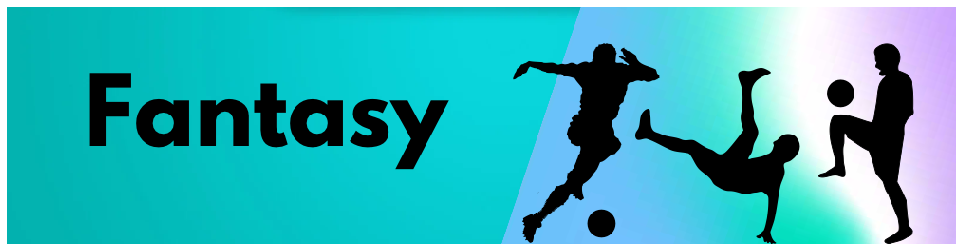

,web_name,now_cost,team_name,goals
1,Haaland,122,Man City,17
2,Kane,115,Spurs,10
3,Mitrović,68,Fulham,9
4,Toney,75,Brentford,8
5,Almirón,54,Newcastle,6
6,Trossard,68,Brighton,6
7,Firmino,81,Liverpool,6
8,Maddison,82,Leicester,6
9,Foden,84,Man City,6
10,Rodrigo,63,Leeds,5


,web_name,position,team_name,now_cost,overall_points_ngw
1,Alisson,Goalkeeper,Liverpool,54,54.344154
2,Raya,Goalkeeper,Brentford,46,49.338310
3,Trippier,Defender,Newcastle,58,59.653780
4,Cancelo,Defender,Man City,74,55.844311
5,Schär,Defender,Newcastle,49,48.432446
6,White,Defender,Arsenal,45,44.602299
7,Botman,Defender,Newcastle,44,42.316335
8,Almirón,Midfielder,Newcastle,54,66.405479
9,Foden,Midfielder,Man City,84,65.252059
10,De Bruyne,Midfielder,Man City,123,63.302705


In [46]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("Fantasy.png")
plt.figure(figsize = (17,5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.axis('off')
plt.show()

from IPython.display import display_html 
styles = [dict(selector="caption",
               props=[("text-align", "center"),
                      ("font-size", "18px"),
                      ("color", "#fff"),
                      ("font-family" , "PremierSans-Regular"),
                      ("font-weight" , "400"),
                      ("background" , "#ff2882"),
                      ("border", "2px solid black")])]

top_10_goals_style = top_10_goals.style.set_table_attributes("style='display:inline; margin-right:5px;'").set_caption("Top 10 Goals").set_table_styles(styles)
top_10_assists_style = top_10_assists.style.set_table_attributes("style='display:inline; margin-right:5px;'").set_caption("Top 10 Assists").set_table_styles(styles)
top_10_clean_sheets_style = top_10_clean_sheets.style.set_table_attributes("style='display:inline;'").set_caption("Top 10 Clean Sheets").set_table_styles(styles)

final_team_new_style = final_team_new.style.set_table_attributes("style='display:inline; margin-right:55px;'").set_caption("15 players squad for next gameweek").set_table_styles(styles)
final_team_new_6_style = final_team_new_6.style.set_table_attributes("style='display:inline'").set_caption("15 players squad for next SIX gameweeks").set_table_styles(styles)

display_html(top_10_goals_style._repr_html_() + top_10_assists_style._repr_html_() + \
             top_10_clean_sheets_style._repr_html_(), raw=True)
display_html(final_team_new_style._repr_html_() + final_team_new_6_style._repr_html_(), raw=True)